In [2]:
import xarray as xr
import ultraplot as pplt
import cartopy.crs as ccrs
import numpy as np

In [3]:
ozo_out = xr.open_dataset('testout.nc')
ozo_in = xr.open_dataset('test_rap.nc')


In [3]:
ozo_out

<xarray.Dataset> Size: 27MB
Dimensions:       (west_east: 151, south_north: 113, vlevs: 39, time: 1)
Coordinates:
  * west_east     (west_east) float32 604B 1.0 2.0 3.0 4.0 ... 149.0 150.0 151.0
  * south_north   (south_north) float32 452B 1.0 2.0 3.0 ... 111.0 112.0 113.0
  * vlevs         (vlevs) float32 156B 1e+03 975.0 950.0 ... 100.0 75.0 50.0
  * time          (time) datetime64[ns] 8B 1997-01-01T02:00:00
Data variables:
    ome_v_QG      (time, vlevs, south_north, west_east) float32 3MB ...
    ome_t_QG      (time, vlevs, south_north, west_east) float32 3MB ...
    GHT           (time, vlevs, south_north, west_east) float32 3MB ...
    PSFC          (time, south_north, west_east) float32 68kB ...
    sigma_elcorr  (time, vlevs, south_north, west_east) float32 3MB ...
    zeta_elcorr   (time, vlevs, south_north, west_east) float32 3MB ...
    vadv          (time, vlevs, south_north, west_east) float32 3MB ...
    tadv          (time, vlevs, south_north, west_east) float32 3MB ...
    fvort         (time, vlevs, south_north, west_east) float32 3MB ...
    diab          (time, vlevs, south_north, west_east) float32 3MB ...
    ageo          (time, vlevs, south_north, west_east) float32 3MB ...

<xarray.DataArray 'vlevs' ()> Size: 4B
array(500., dtype=float32)
Coordinates:
    vlevs    float32 4B 500.0
Attributes:
    standard_name:  air_pressure
    units:          hPa
    positive:       down
    axis:           Z


/tmp/ipykernel_965203/203682962.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/gblumberg/miniforge3/envs/default/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/gblumberg/miniforge3/envs/default/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


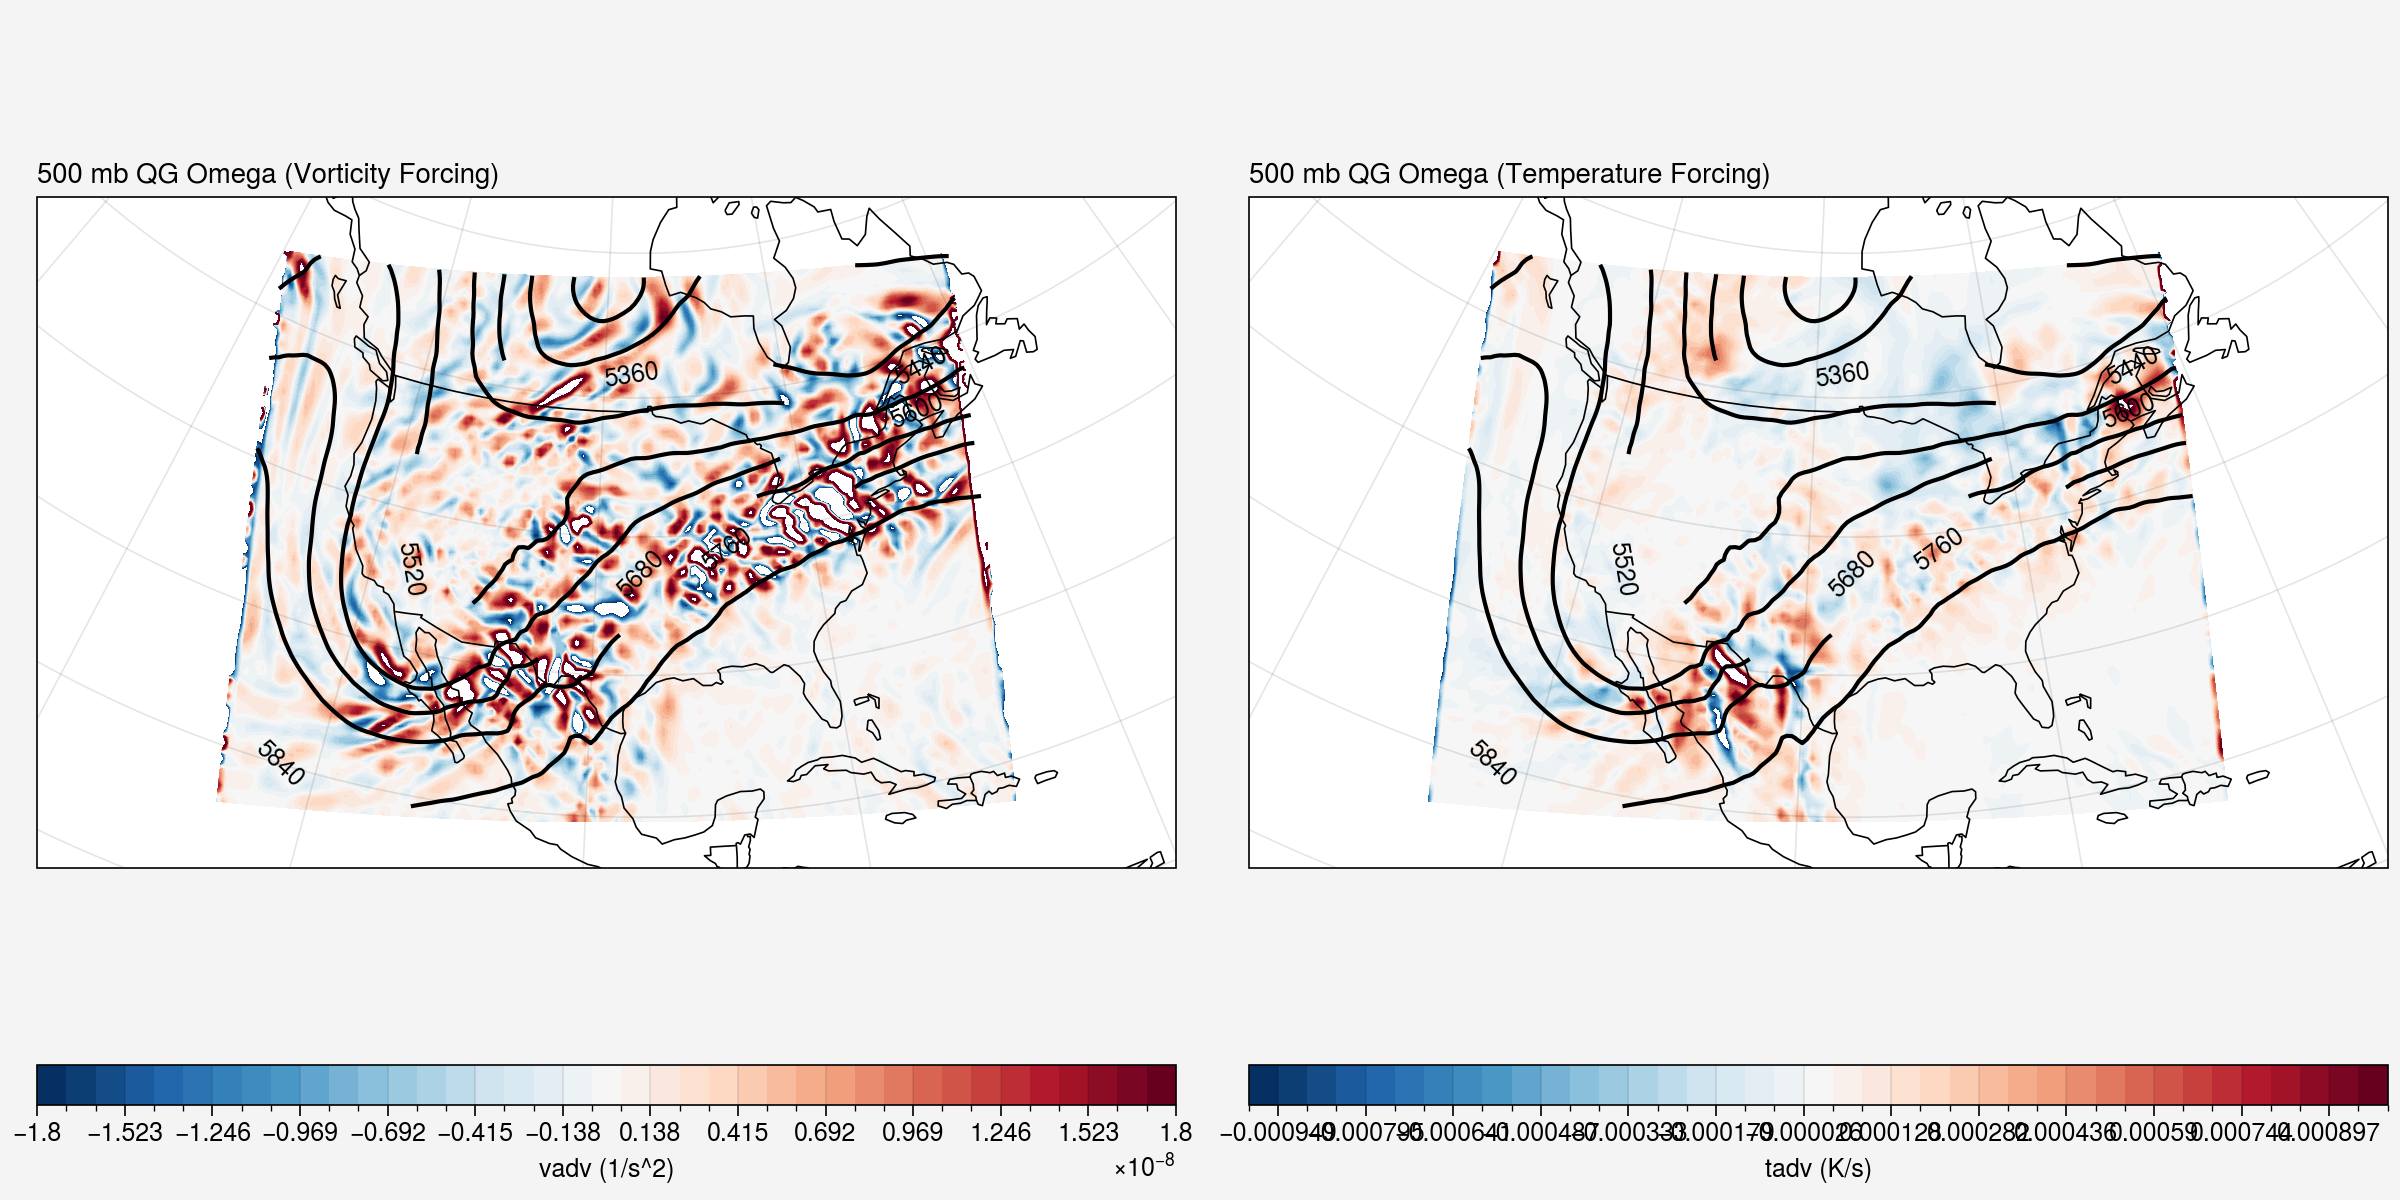

In [4]:
ozo_out = xr.open_dataset('testout.nc')

time = 0
lev = 20
vlevels = np.linspace(-18e-9, 18e-9,40)
tlevels = np.linspace(-1e-3, 1e-3,40)


plev = int(ozo_out.vlevs.values[lev])
print(ozo_out.vlevs[lev])
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(12,6), projection='lcc')
c = axs[0].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_out['vadv'][time,lev], transform=ccrs.PlateCarree(), levels=vlevels)
c2 = axs[0].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_out['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[0].colorbar(c, orientation='horizontal')
axs[0].clabel(c2)
axs[0].format(ltitle=f"{plev} mb QG Omega (Vorticity Forcing)", coast=True, borders=True, 
              latlim=(ozo_in.XLAT.values.min(), ozo_in.XLAT.values.max()),
              lonlim=(ozo_in.XLONG.values.min(), ozo_in.XLONG.values.max()))

c2 = axs[1].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_out['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[1].clabel(c2)

c = axs[1].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_out['tadv'][time,lev], transform=ccrs.PlateCarree(), levels=tlevels)
axs[1].colorbar(c, orientation='horizontal')

axs[1].format(ltitle=f"{plev} mb QG Omega (Temperature Forcing)", coast=True, borders=True, 
              latlim=(ozo_in.XLAT.values.min(), ozo_in.XLAT.values.max()),
              lonlim=(ozo_in.XLONG.values.min(), ozo_in.XLONG.values.max()))
fig.show()


<xarray.DataArray 'vlevs' ()> Size: 4B
array(500., dtype=float32)
Coordinates:
    vlevs    float32 4B 500.0
Attributes:
    standard_name:  air_pressure
    units:          hPa
    positive:       down
    axis:           Z


/tmp/ipykernel_1375732/3282823857.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


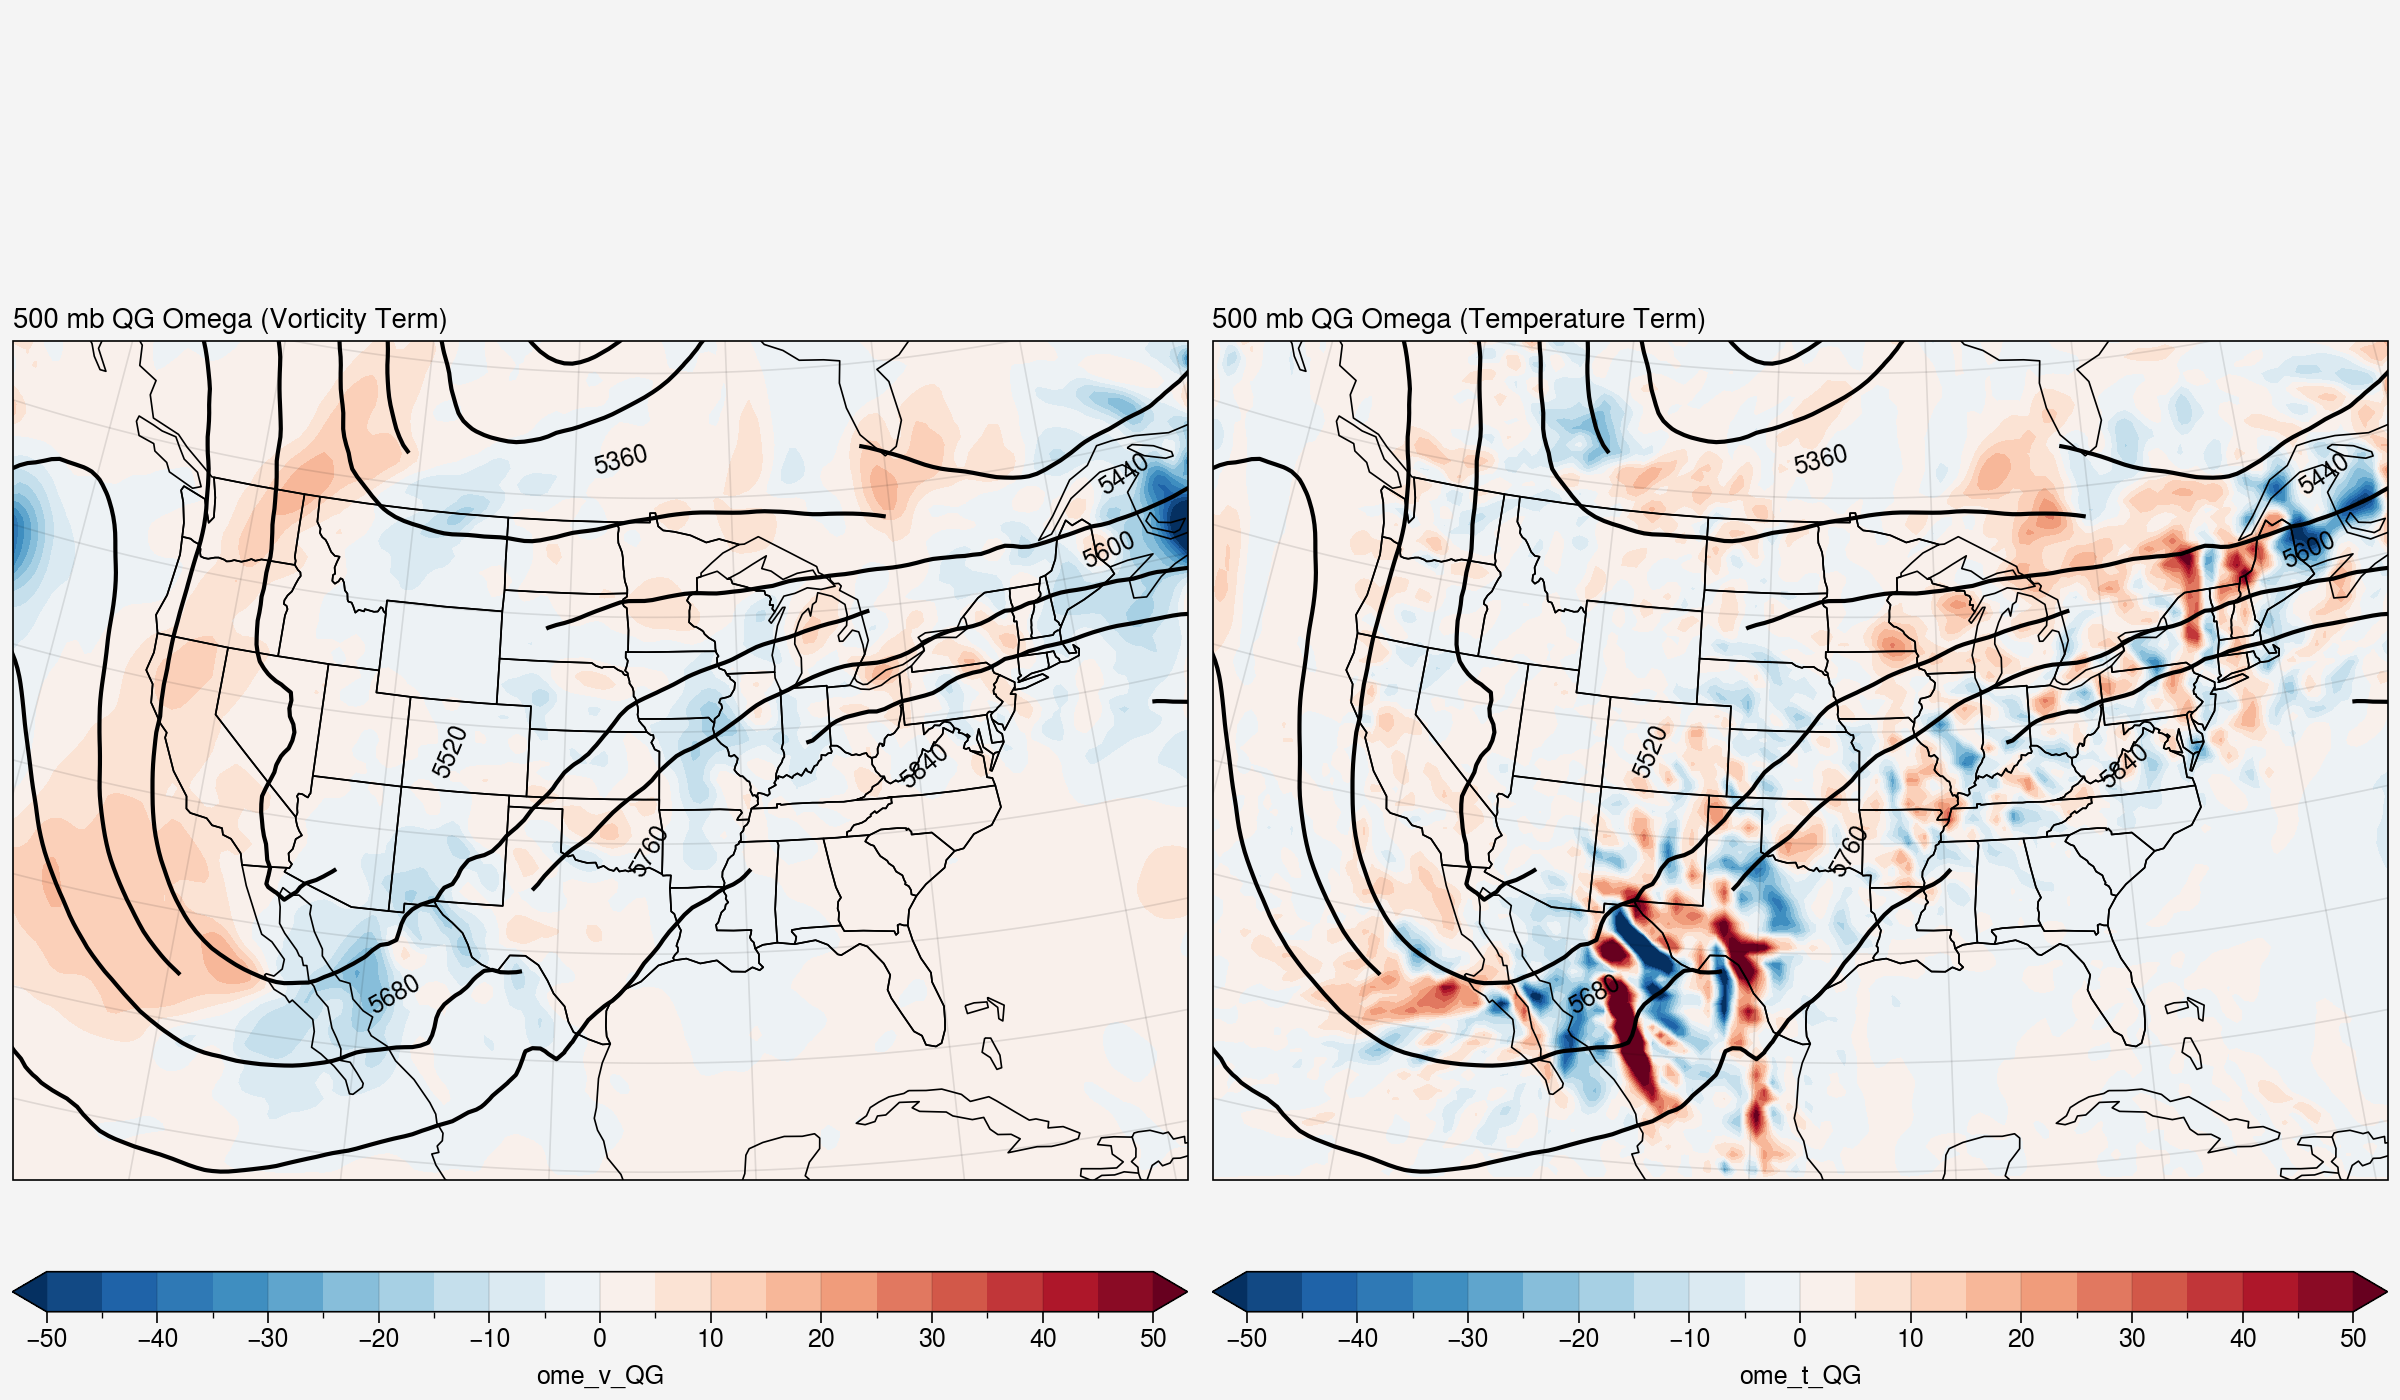

In [31]:
ozo_out = xr.open_dataset('testout_qg_rap.nc')

rap_proj = pplt.LambertConformal(central_longitude=-95, central_latitude=35, standard_parallels=(25,25))
time = 0
lev = 20

tlevels = vlevels = np.arange(-1.5,1.6,.1) * (3600./100.)
tlevels = vlevels = np.arange(-50,55,5)
plev = int(ozo_out.vlevs.values[lev])
print(ozo_out.vlevs[lev])
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(12,7), projection=rap_proj)
c = axs[0].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_out['ome_v_QG'][time,lev]*(3600./100.), transform=ccrs.PlateCarree(), levels=vlevels, extend='both')
c2 = axs[0].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_out['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[0].colorbar(c, orientation='horizontal')
axs[0].clabel(c2)
axs[0].format(ltitle=f"{plev} mb QG Omega (Vorticity Term)", coast=True, borders=True, 
              latlim=(19.5,54.173),
              lonlim=(-69.038, -126.138), innerborders=True)

c2 = axs[1].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_out['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[1].clabel(c2)

c = axs[1].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_out['ome_t_QG'][time,lev] *(3600./100.), transform=ccrs.PlateCarree(), levels=tlevels, extend='both')
axs[1].colorbar(c, orientation='horizontal', space=-10)

axs[1].format(ltitle=f"{plev} mb QG Omega (Temperature Term)", coast=True, borders=True, 
              latlim=(19.5,54.173),
              lonlim=(-69.038, -126.138), innerborders=True)
fig.show()


<xarray.DataArray 'vlevs' ()> Size: 4B
array(925., dtype=float32)
Coordinates:
    vlevs    float32 4B 925.0
Attributes:
    standard_name:  air_pressure
    units:          hPa
    positive:       down
    axis:           Z


/tmp/ipykernel_1375732/2035369070.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_1375732/2035369070.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


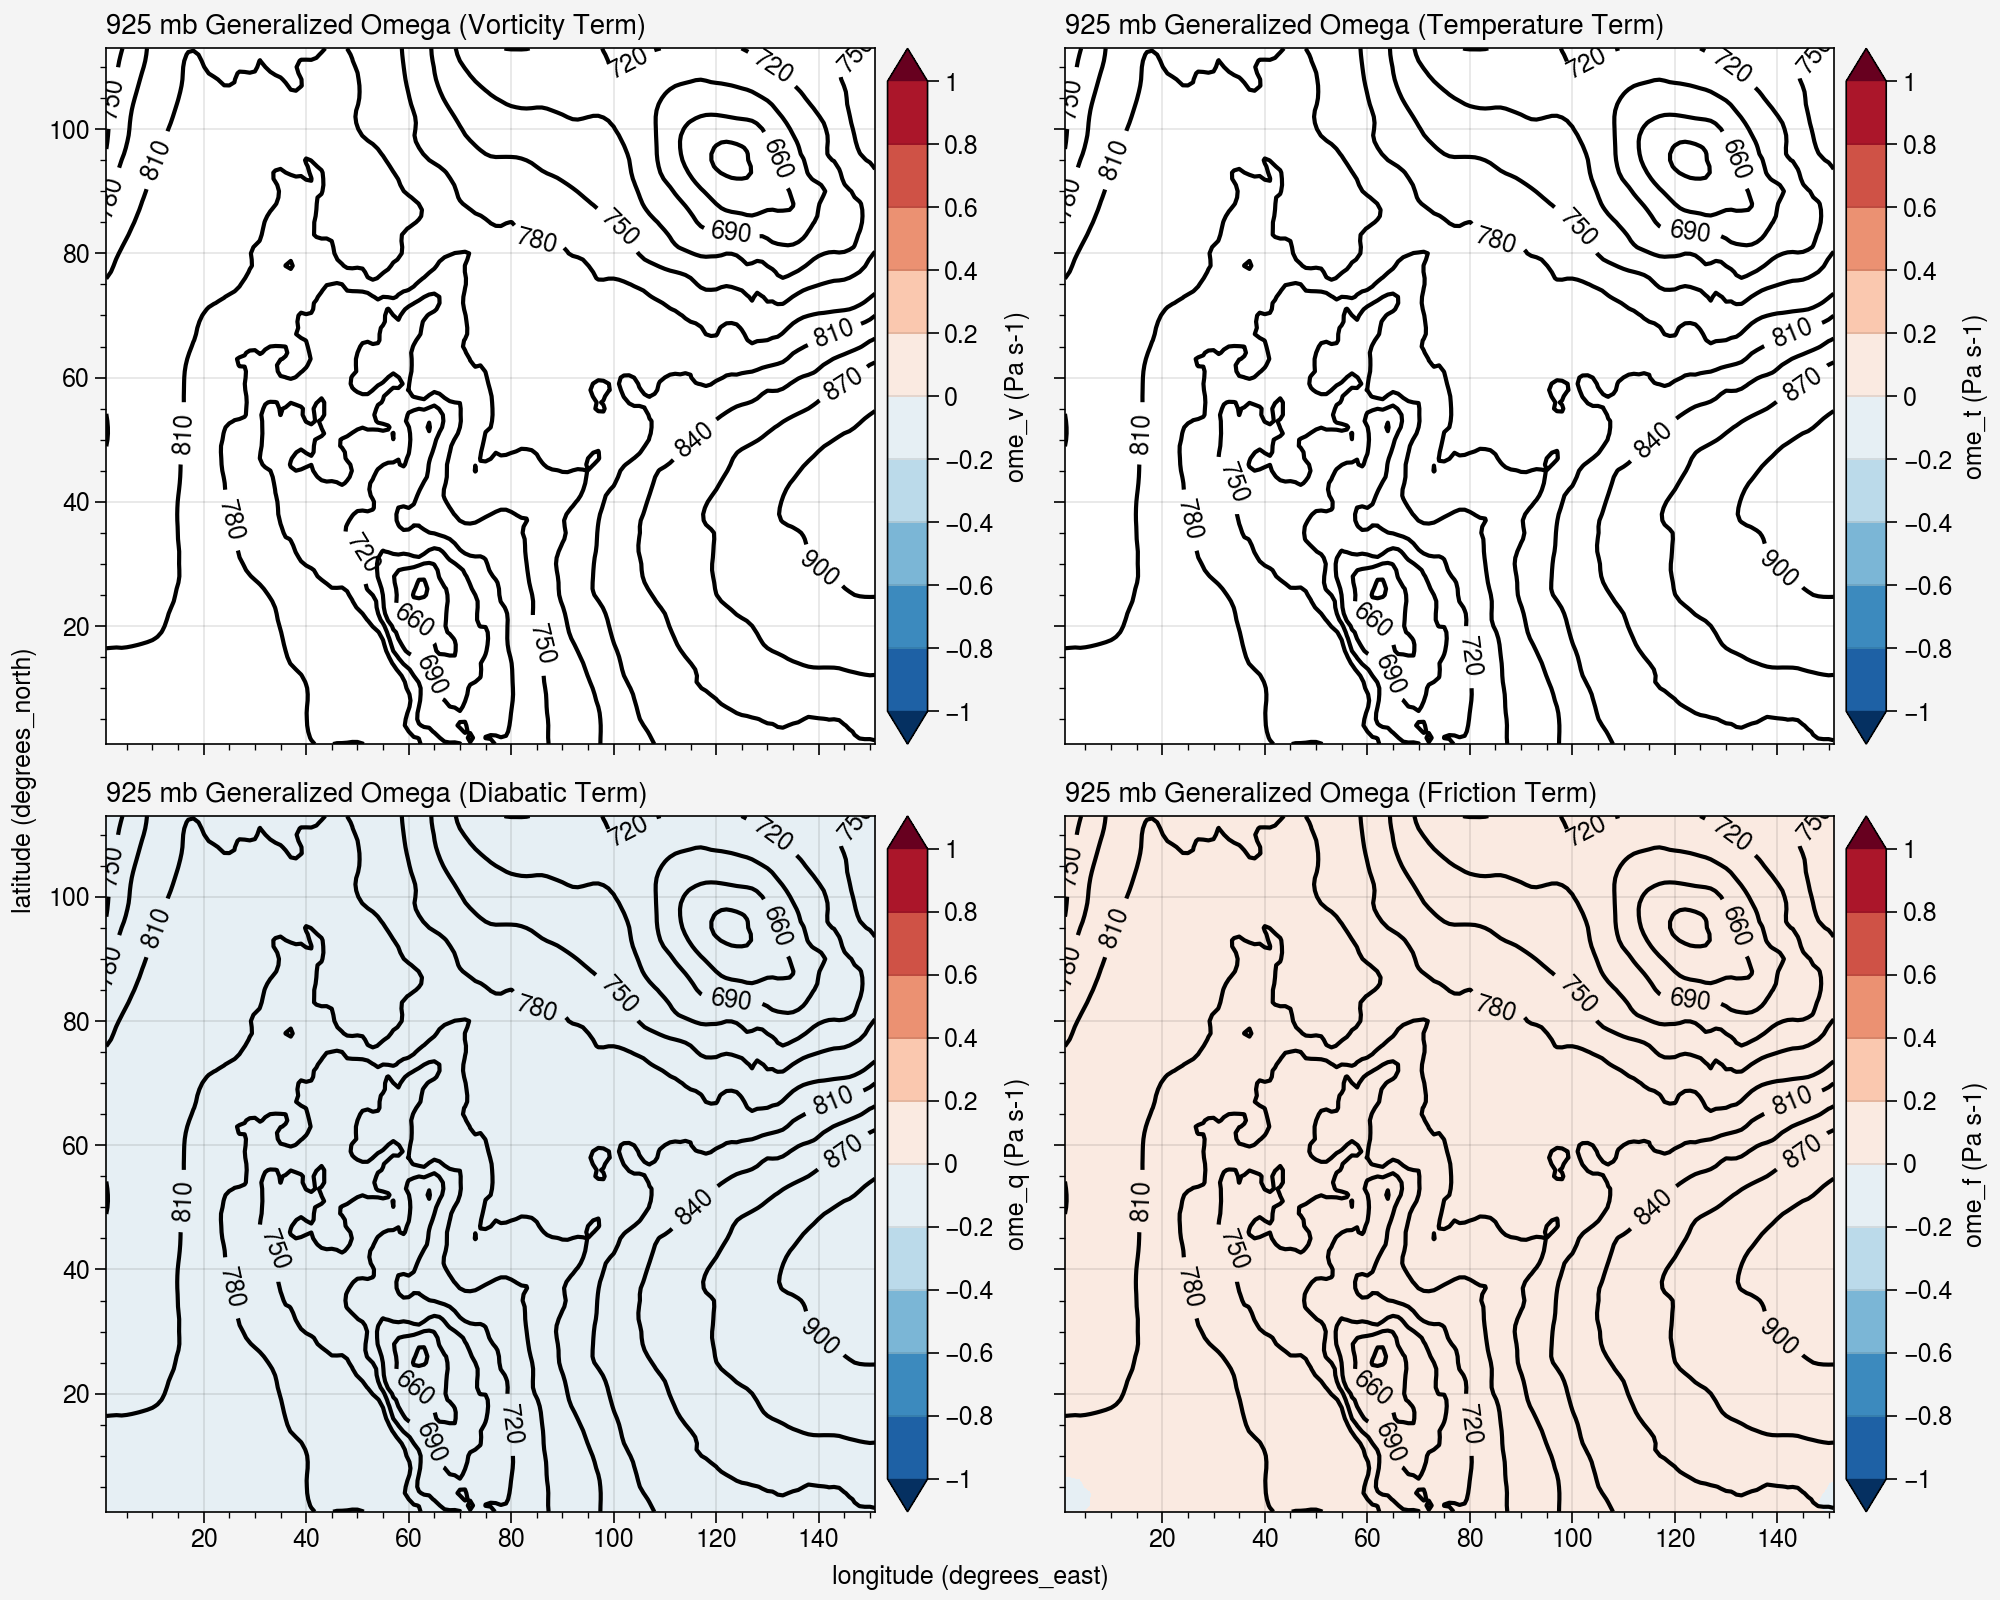

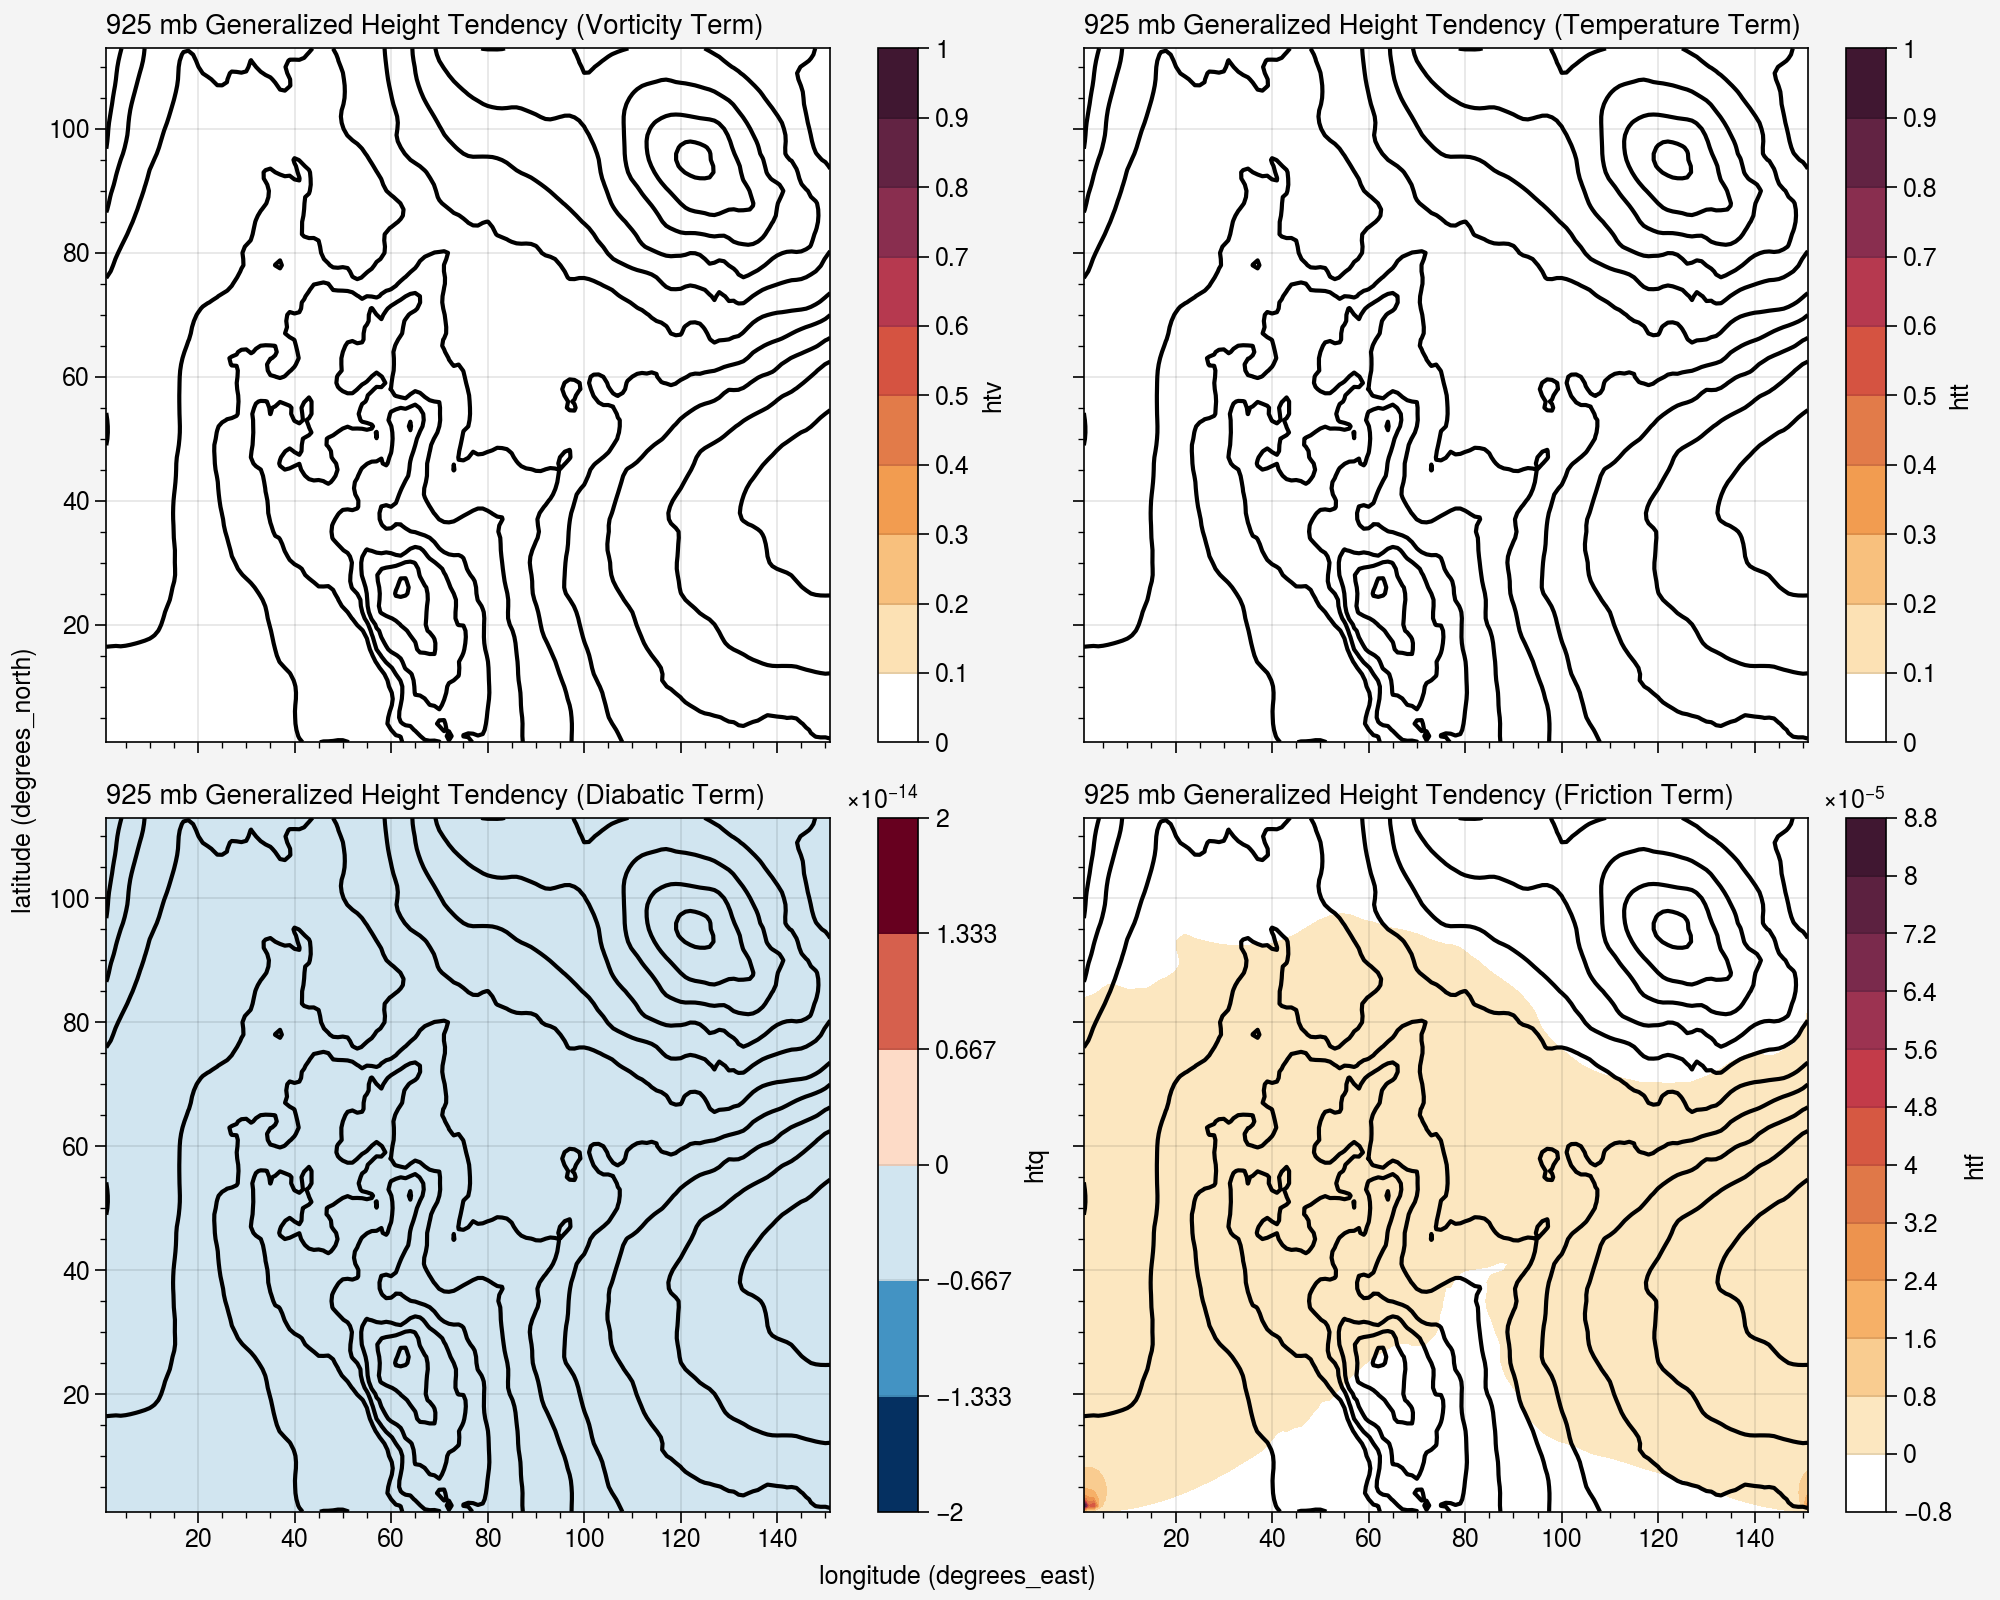

In [10]:
ozo_out = xr.open_dataset('testout.nc')

time = 0
lev = 3 # (3 is 850 mb, 6 is 700 mb, 10 is 500 mb, 14 is 300 mb)

plev = int(ozo_out.vlevs.values[lev])
print(ozo_out.vlevs[lev])
fig, axs = pplt.subplots(nrows=2, ncols=2, figsize=(10,8))
axs[0].format(ltitle=f"{plev} mb Generalized Omega (Vorticity Term)")
c = axs[0].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['ome_v'][time,lev], vmin=-1, vmax=1, extend='both')
c2 = axs[0].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[0].colorbar(c)
axs[0].clabel(c2)
axs[1].format(ltitle=f"{plev} mb Generalized Omega (Temperature Term)")
c = axs[1].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['ome_t'][time,lev], vmin=-1, vmax=1, extend='both')
c2 = axs[1].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[1].colorbar(c)
axs[1].clabel(c2)

axs[2].format(ltitle=f"{plev} mb Generalized Omega (Diabatic Term)")
c = axs[2].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['ome_q'][time,lev], vmin=-1, vmax=1, extend='both')
c2 = axs[2].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[2].colorbar(c)
axs[2].clabel(c2)

axs[3].format(ltitle=f"{plev} mb Generalized Omega (Friction Term)")
c = axs[3].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['ome_f'][time,lev], vmin=-1, vmax=1, extend='both')
c2 = axs[3].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[3].colorbar(c)
axs[3].clabel(c2)
fig.show()


fig, axs = pplt.subplots(nrows=2, ncols=2, figsize=(10,8))
axs[0].format(ltitle=f"{plev} mb Generalized Height Tendency (Vorticity Term)")
c = axs[0].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['htv'][time,lev]*(3600*12))
axs[0].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[0].colorbar(c)
axs[1].format(ltitle=f"{plev} mb Generalized Height Tendency (Temperature Term)")
c = axs[1].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['htt'][time,lev] *(3600*12))
axs[1].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[1].colorbar(c)

axs[2].format(ltitle=f"{plev} mb Generalized Height Tendency (Diabatic Term)")
c = axs[2].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['htq'][time,lev] * 3600*12)
axs[2].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[2].colorbar(c)
axs[3].format(ltitle=f"{plev} mb Generalized Height Tendency (Friction Term)")
c = axs[3].contourf(ozo_out.west_east, ozo_out.south_north, ozo_out['htf'][time,lev] * 3600 * 12)
axs[3].contour(ozo_out.west_east, ozo_out.south_north, ozo_out['GHT'][time,lev], colors='k')
axs[3].colorbar(c)
fig.show()

<xarray.DataArray 'vlevs' ()> Size: 4B
array(500., dtype=float32)
Coordinates:
    vlevs    float32 4B 500.0
Attributes:
    standard_name:  air_pressure
    units:          hPa
    positive:       down
    axis:           Z


/var/folders/51/n1wsvkk55p1dlnwf9sh8t3bw0000gn/T/ipykernel_37331/3085912047.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


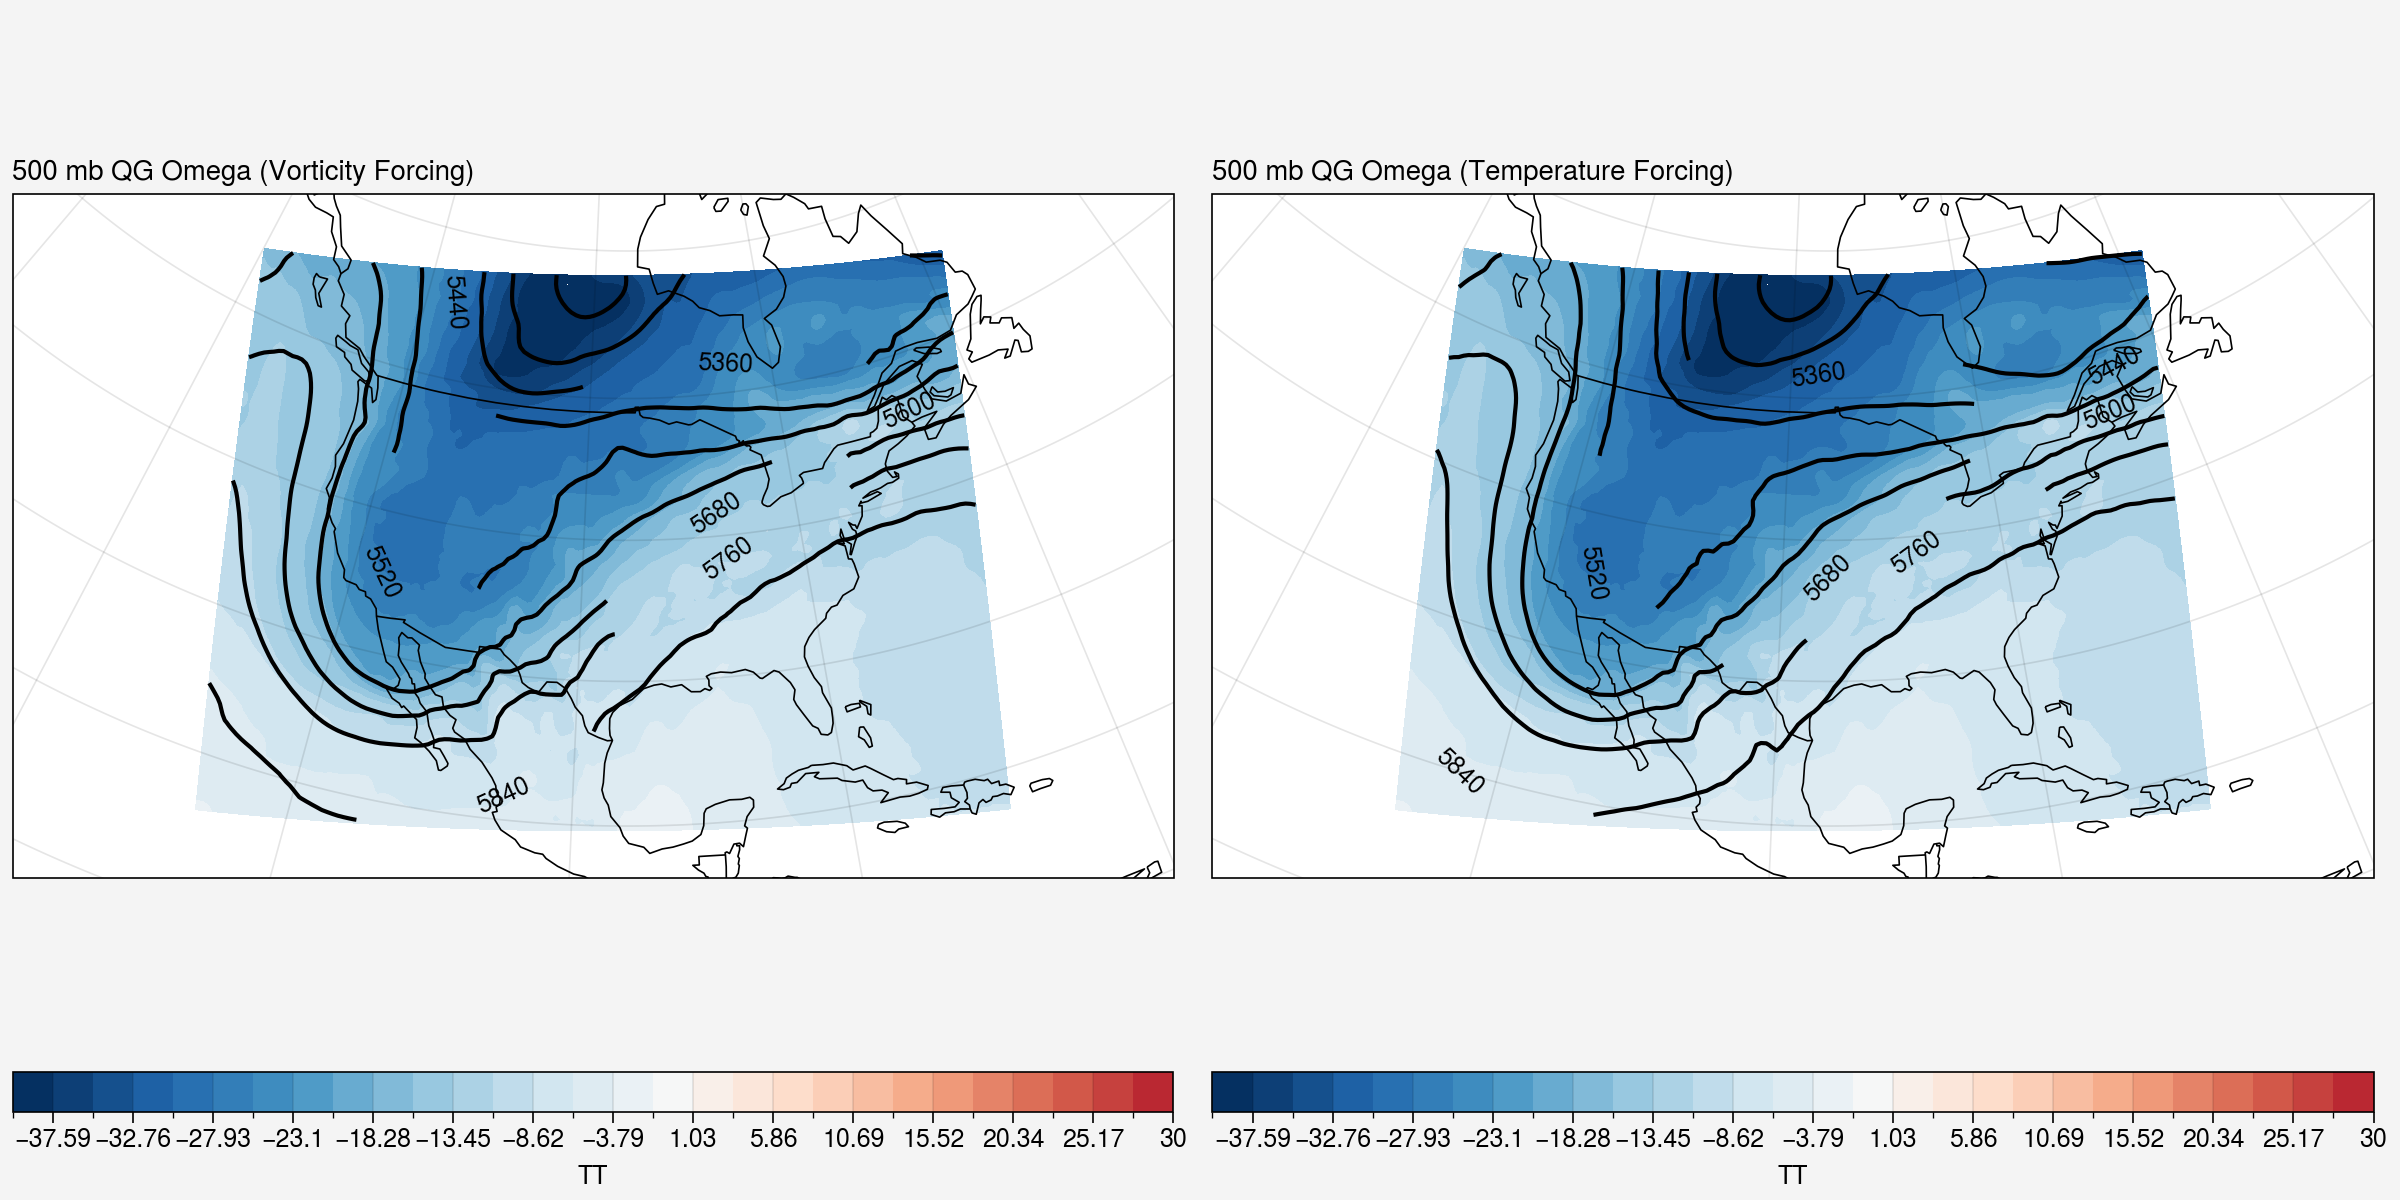

In [67]:
ozo_out = xr.open_dataset('testout_qg_forc.nc')

time = 0
lev = 20
vlevels = np.linspace(-40, 30,30)
tlevels = np.linspace(-40, 30,30)


plev = int(ozo_out.vlevs.values[lev])
print(ozo_out.vlevs[lev])
fig, axs = pplt.subplots(nrows=1, ncols=2, figsize=(12,6), projection='lcc')
c = axs[0].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_in['TT'][time,lev]-273.15, transform=ccrs.PlateCarree(), levels=vlevels)
c2 = axs[0].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_in['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[0].colorbar(c, orientation='horizontal')
axs[0].clabel(c2)
axs[0].format(ltitle=f"{plev} mb QG Omega (Vorticity Forcing)", coast=True, borders=True, 
              latlim=(ozo_in.XLAT.values.min(), ozo_in.XLAT.values.max()),
              lonlim=(ozo_in.XLONG.values.min(), ozo_in.XLONG.values.max()))

c2 = axs[1].contour(ozo_in.XLONG, ozo_in.XLAT, ozo_out['GHT'][time,lev], colors='k', transform=ccrs.PlateCarree())
axs[1].clabel(c2)

c = axs[1].contourf(ozo_in.XLONG, ozo_in.XLAT, ozo_in['TT'][time,lev]-273.15, transform=ccrs.PlateCarree(), levels=tlevels)
axs[1].colorbar(c, orientation='horizontal')

axs[1].format(ltitle=f"{plev} mb QG Omega (Temperature Forcing)", coast=True, borders=True, 
              latlim=(ozo_in.XLAT.values.min(), ozo_in.XLAT.values.max()),
              lonlim=(ozo_in.XLONG.values.min(), ozo_in.XLONG.values.max()))
fig.show()
Hi all

In [32]:
ozo_in.close()

In [18]:
ozo_in.XLONG

<xarray.DataArray 'XLONG' (south_north: 113, west_east: 151)> Size: 137kB
array([[-126.138   , -125.771261, -125.404063, ...,  -69.783843,  -69.410714,
         -69.037976],
       [-126.223923, -125.856243, -125.4881  , ...,  -69.713401,  -69.339278,
         -68.965551],
       [-126.310312, -125.941687, -125.572596, ...,  -69.642568,  -69.267448,
         -68.892726],
       ...,
       [-139.509764, -139.004508, -138.497983, ...,  -58.723358,  -58.200115,
         -57.677994],
       [-139.682296, -139.175369, -138.667158, ...,  -58.5792  ,  -58.054085,
         -57.530105],
       [-139.856122, -139.347514, -138.837607, ...,  -58.433919,  -57.906921,
         -57.38107 ]])
Coordinates:
    XLAT     (south_north, west_east) float64 137kB 16.28 16.36 ... 55.57 55.48
    XLONG    (south_north, west_east) float64 137kB -126.1 -125.8 ... -57.38
Dimensions without coordinates: south_north, west_east

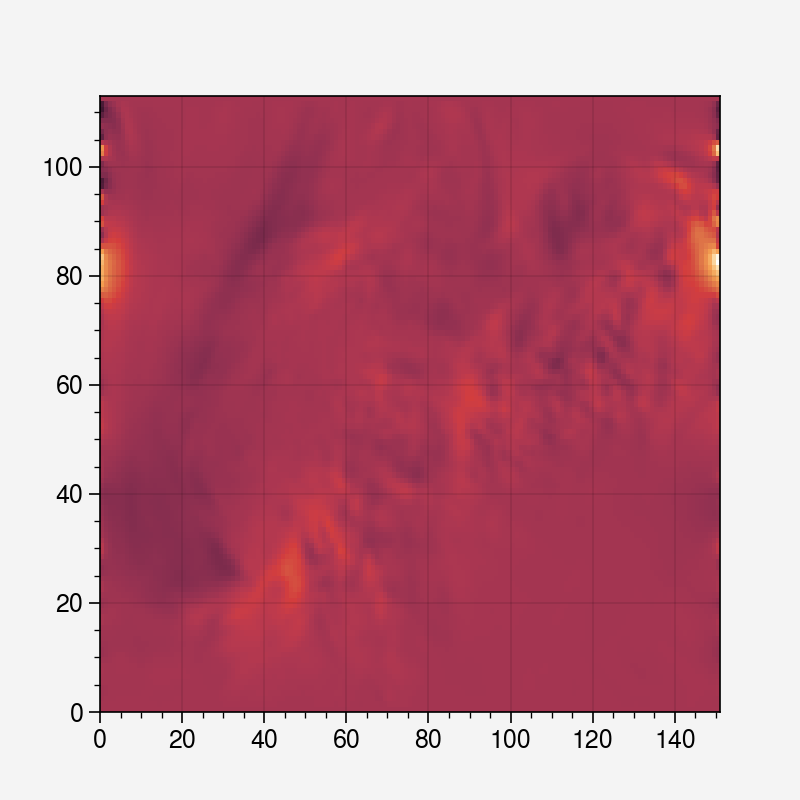

In [22]:
import matplotlib.pyplot as plt

plt.pcolormesh(ozo_out['ome_v_QG'][0,20].values)